### Bag of words: Exercises
In this Exercise, you are going to classify whether a given movie review is positive or negative.
you are going to use Bag of words for pre-processing the text and apply different classification algorithms.
Sklearn CountVectorizer has the inbuilt implementations for Bag of Words.

In [1]:
#Import necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

C:\Users\baps\AppData\Local\Temp\ipykernel_19416\4285187407.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### About Data: IMDB Dataset
Credits: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?resource=download

This data consists of two columns. - review - sentiment
Reviews are the statements given by users after watching the movie.
sentiment feature tells whether the given review is positive or negative.

In [3]:
#1. read the data provided in the same directory with name 'movies_sentiment_data.csv' and store it in df variable
df=pd.read_csv("assets/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
df["sentimate_teg"]=df["sentiment"].apply(lambda x: 1 if x =="positive" else 0)
df["sentiment"].unique()

array(['positive', 'negative'], dtype=object)

In [7]:
df.head()

,review,sentiment,sentimate_teg
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [9]:
df.shape

(50000, 3)

In [16]:
df["review"]=df["review"].apply(lambda a:a.replace("<br />",""))
df.head()

,review,sentiment,sentimate_teg
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. The filming tec...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [19]:
x_train,x_test,y_train,y_test=train_test_split(df["review"],df["sentimate_teg"],test_size=.2)

In [20]:
x_train.shape

(40000,)

In [23]:
pipe=Pipeline([
    ("vactorizer",CountVectorizer()),
   ("model", MultinomialNB())
])

In [24]:
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [26]:
score=pipe.score(x_test,y_test)
score

0.8515

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      4929
           1       0.88      0.82      0.85      5071

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



<Axes: >

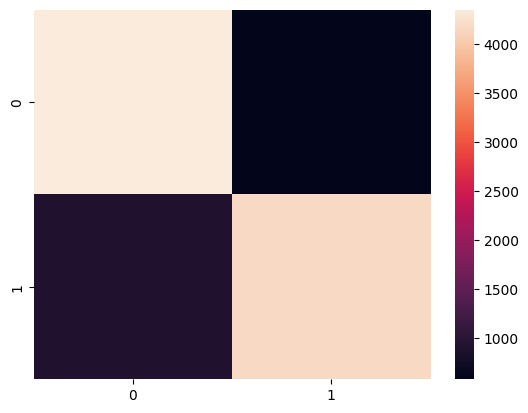

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sbn

cm=confusion_matrix(y_test,y_pred)
sbn.heatmap(cm)

<Axes: >

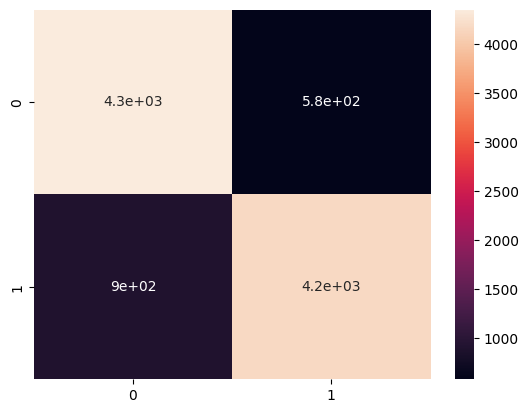

In [30]:
from matplotlib import pyplot as plt


plt.xlabel("predited")
plt.ylabel("real")
sbn.heatmap(cm,annot=True)

In [33]:
pipeKn=Pipeline([
    ("counterize",CountVectorizer()),
    ("model",KNeighborsClassifier())
])

In [34]:
pipeKn.fit(x_train,y_train)
pipeKn.score(x_test,y_test)

0.6395

In [35]:
pipeRf=Pipeline([
    ("counterize",CountVectorizer()),
    ("model",RandomForestClassifier())
])
pipeRf.fit(x_train,y_train)
pipeRf.score(x_test,y_test)

0.8482